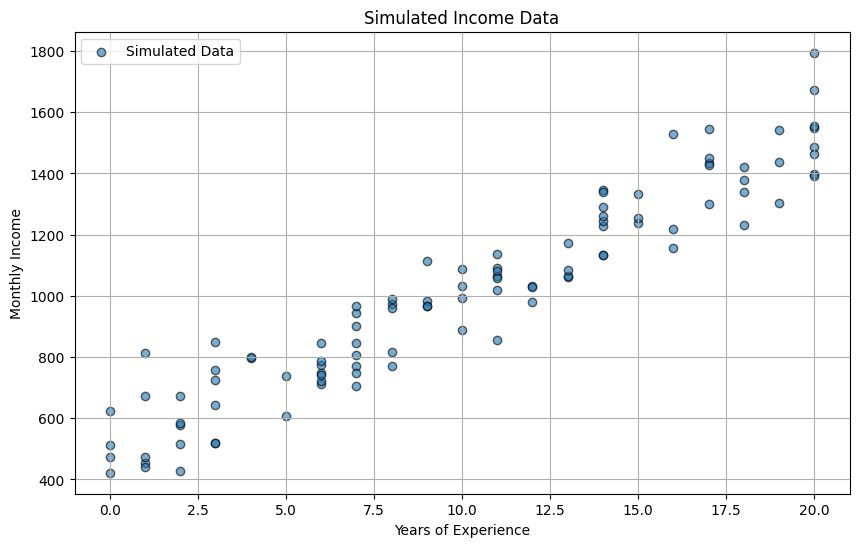

First 10 data points:
Experience (years): [ 6 19 14 10  7 20  6 18 10 10]
Income: [ 710.36648169 1438.80121795 1346.89412854  887.61016655  945.00053955
 1672.65164686  845.7885077  1231.57126216 1032.6845224   991.88810458]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 100
beta_0 = 500
beta_1 = 50
noise_std_dev = 100

experience = np.random.randint(0, 21, n_samples)
noise = np.random.normal(0, noise_std_dev, n_samples)
income = beta_0 + beta_1 * experience + noise

plt.figure(figsize=(10, 6))
plt.scatter(experience, income, alpha=0.6, edgecolors='k', label='Simulated Data')
plt.title('Simulated Income Data')
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

print("First 10 data points:")
print("Experience (years):", experience[:10])
print("Income:", income[:10])


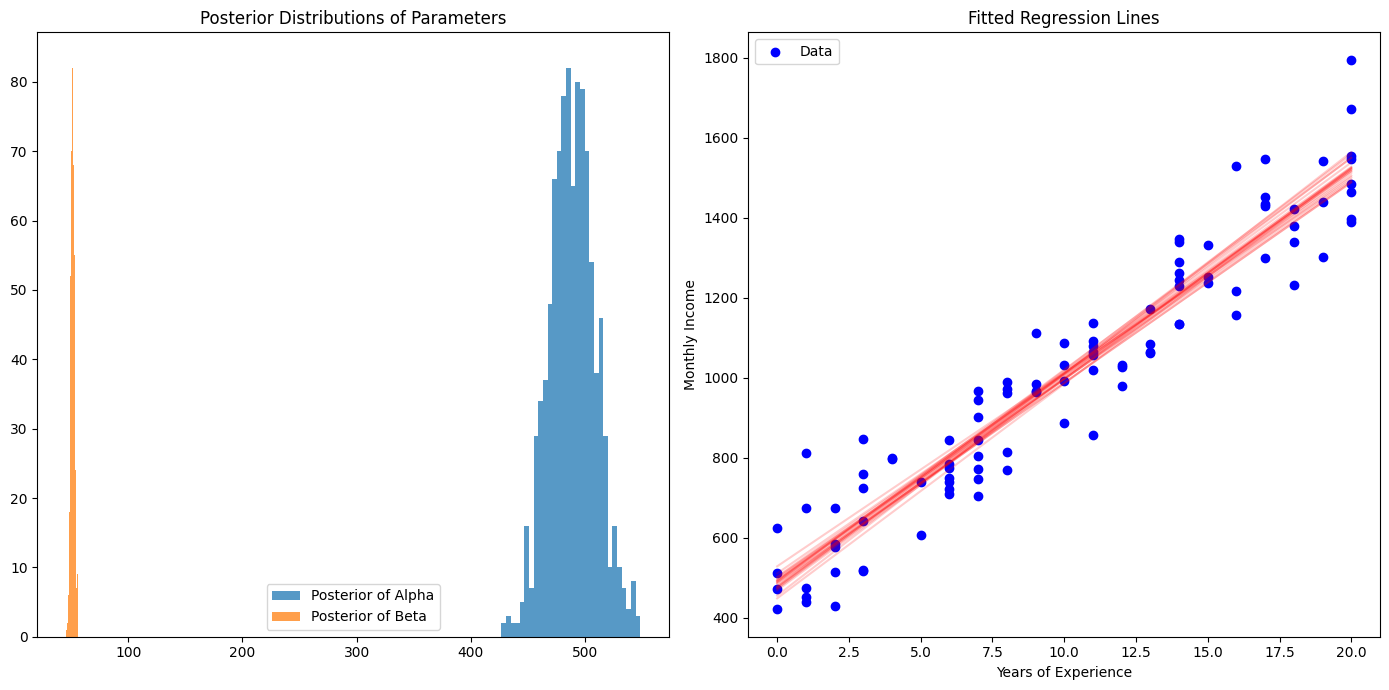

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

np.random.seed(42)

experience = np.random.randint(0, 21, 100)
noise = np.random.normal(0, 100, 100)
income = 500 + 50 * experience + noise

alpha_0 = np.array([0, 0])
Lambda_0 = np.eye(2) * 0.01
nu_0 = 1
sigma2_0 = 100
X = np.vstack([np.ones(len(experience)), experience]).T

Lambda_n = Lambda_0 + X.T @ X
alpha_n = np.linalg.inv(Lambda_n) @ (Lambda_0 @ alpha_0 + X.T @ income)

residuals = income - X @ alpha_n
nu_n = nu_0 + len(income)
sigma2_n = (nu_0 * sigma2_0 + residuals.T @ residuals) / nu_n

num_samples = 1000
posterior_sigma2 = invgamma.rvs(a=nu_n/2, scale=nu_n * sigma2_n / 2, size=num_samples)
posterior_alphas = np.array([np.random.multivariate_normal(mean=alpha_n, cov=np.linalg.inv(Lambda_n) * sigma2, size=1)[0] for sigma2 in posterior_sigma2])


plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(posterior_alphas[:, 0], bins=30, alpha=0.75, label='Posterior of Alpha')
plt.hist(posterior_alphas[:, 1], bins=30, alpha=0.75, label='Posterior of Beta')
plt.title('Posterior Distributions of Parameters')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(experience, income, color='blue', label='Data')
sorted_idx = np.argsort(experience)
for alpha_sample in posterior_alphas[::50]:
    plt.plot(experience[sorted_idx], alpha_sample[0] + alpha_sample[1] * experience[sorted_idx], color='red', alpha=0.2)

plt.title('Fitted Regression Lines')
plt.xlabel('Years of Experience')
plt.ylabel('Monthly Income')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
pip install pymc3